In [2]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=c0daae20f3235e7b14c584c0dadbed62bce5bb04ffa887a1aadfe6fa02a1062f
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [4]:
gr = pd.read_csv('/content/groceries.csv', sep='delimiter', header=None)
gr.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


(9835, 1)

In [5]:
#Finding all items present in our data - groceries.csv
#We will have to use the csv package so that we can read each line one by one and update any new grocery item.

import csv
all_items = set()#set of all items
with open('groceries.csv') as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        all_items.update(line)

In [6]:
#Now, we count if a particular item appears in the a particular row and update it in a list format.

counting = list()
with open('groceries.csv') as f:
    reader = csv.reader(f, delimiter = ',')
    for i, line in enumerate(reader):
        row = {item:0 for item in all_items}
        row.update({item:1 for item in line})
        counting.append(row)

In [7]:
#Next, convert the list in to Pandas DataFrame so that we can do pandas operations.

groceries = pd.DataFrame(counting)
groceries.head()
# 0 represents that the item is not present in a particular row/ item order list.

,condensed milk,potato products,other vegetables,male cosmetics,curd cheese,baby food,nut snack,dental care,dishes,salt,prosecco,frankfurter,beverages,cleaner,meat,zwieback,sound storage medium,sliced cheese,liquor,chicken,canned beer,tidbits,hygiene articles,yogurt,whole milk,specialty bar,spread cheese,UHT-milk,misc. beverages,roll products,onions,soft cheese,frozen chicken,house keeping products,pudding powder,sausage,pip fruit,vinegar,candy,sugar,...,packaged fruit/vegetables,liquor (appetizer),honey,waffles,cooking chocolate,nuts/prunes,hard cheese,spices,brandy,Instant food products,fruit/vegetable juice,ready soups,oil,specialty fat,tea,frozen meals,beef,pot plants,coffee,rolls/buns,domestic eggs,bathroom cleaner,ham,candles,chocolate,specialty chocolate,rice,flower (seeds),jam,frozen dessert,soda,syrup,toilet cleaner,female sanitary products,cereals,skin care,fish,popcorn,whisky,pork
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
groceries.shape

(9835, 169)

In [9]:
# finding item count is now easy 
# 1) Find total number of items i.e sum of all the sums of row
total_itemcount = sum(groceries.sum())
total_itemcount

43367

In [10]:
# 2) Sum the rows and sort in descending order to get top 20 items
item_sum = groceries.sum().sort_values(ascending=False).reset_index().head(n=20)
item_sum.rename(columns = {item_sum.columns[0] : 'Item_Name',item_sum.columns[1] : 'Item_Count'}, inplace=True)
item_sum

,Item_Name,Item_Count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
5,bottled water,1087
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,969
9,sausage,924


In [11]:
# 3) Add the percent so that we know how much it contributes. 

item_sum['Item_percent'] = item_sum['Item_Count']/total_itemcount
item_sum['Tot_percent'] = item_sum.Item_percent.cumsum()
print(item_sum.head(20))

                Item_Name  Item_Count  Item_percent  Tot_percent
0              whole milk        2513      0.057947     0.057947
1        other vegetables        1903      0.043881     0.101829
2              rolls/buns        1809      0.041714     0.143542
3                    soda        1715      0.039546     0.183089
4                  yogurt        1372      0.031637     0.214725
5           bottled water        1087      0.025065     0.239791
6         root vegetables        1072      0.024719     0.264510
7          tropical fruit        1032      0.023797     0.288307
8           shopping bags         969      0.022344     0.310651
9                 sausage         924      0.021307     0.331957
10                 pastry         875      0.020177     0.352134
11           citrus fruit         814      0.018770     0.370904
12           bottled beer         792      0.018263     0.389167
13             newspapers         785      0.018101     0.407268
14            canned beer

Text(0.5, 1.0, 'Item sales distribution')

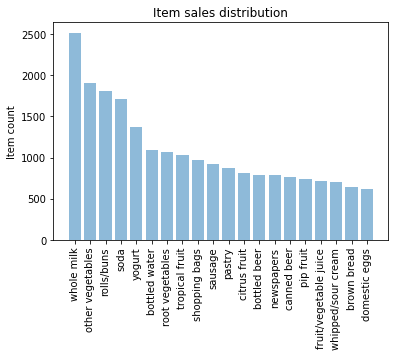

In [12]:
# Plot

obj = (list(item_sum['Item_Name'].head(n=20)))
y_pos = np.arange(len(obj)) # x = The x coordinates of the bars.
performance = list(item_sum['Item_Count'].head(n=20)) # height of the bar

import matplotlib.pyplot as plt
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, obj, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')

In [13]:
groceries

,condensed milk,potato products,other vegetables,male cosmetics,curd cheese,baby food,nut snack,dental care,dishes,salt,prosecco,frankfurter,beverages,cleaner,meat,zwieback,sound storage medium,sliced cheese,liquor,chicken,canned beer,tidbits,hygiene articles,yogurt,whole milk,specialty bar,spread cheese,UHT-milk,misc. beverages,roll products,onions,soft cheese,frozen chicken,house keeping products,pudding powder,sausage,pip fruit,vinegar,candy,sugar,...,packaged fruit/vegetables,liquor (appetizer),honey,waffles,cooking chocolate,nuts/prunes,hard cheese,spices,brandy,Instant food products,fruit/vegetable juice,ready soups,oil,specialty fat,tea,frozen meals,beef,pot plants,coffee,rolls/buns,domestic eggs,bathroom cleaner,ham,candles,chocolate,specialty chocolate,rice,flower (seeds),jam,frozen dessert,soda,syrup,toilet cleaner,female sanitary products,cereals,skin care,fish,popcorn,whisky,pork
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9832,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [14]:
groceries.columns

Index(['condensed milk', 'potato products', 'other vegetables',
       'male cosmetics', 'curd cheese', 'baby food', 'nut snack',
       'dental care', 'dishes', 'salt',
       ...
       'soda', 'syrup', 'toilet cleaner', 'female sanitary products',
       'cereals', 'skin care', 'fish', 'popcorn', 'whisky', 'pork'],
      dtype='object', length=169)

In [15]:
# Get the rules
freq_item = apriori(groceries, min_support = 0.01, use_colnames = True)
freq_item

,support,itemsets
0,0.010269,(condensed milk)
1,0.193493,(other vegetables)
2,0.017590,(dishes)
3,0.010778,(salt)
4,0.058973,(frankfurter)
...,...,...
328,0.015557,"(whole milk, rolls/buns, yogurt)"
329,0.010473,"(whole milk, soda, yogurt)"
330,0.011998,"(whole milk, tropical fruit, root vegetables)"
331,0.010981,"(whole milk, rolls/buns, tropical fruit)"


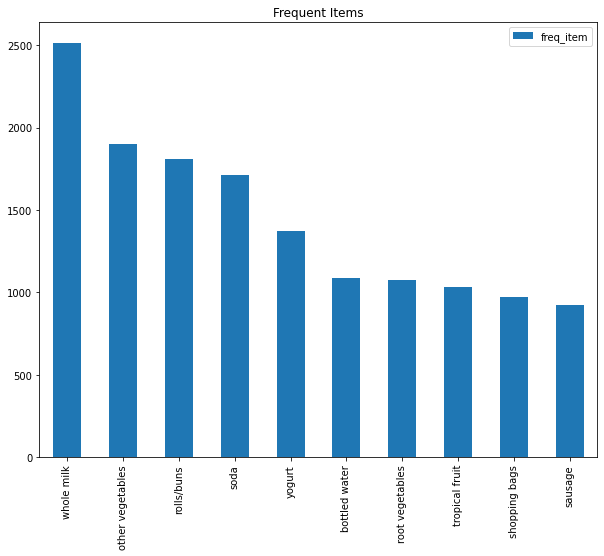

In [16]:
#Quick look at the top 10 items
import matplotlib.pyplot as plt
groceries.sum().to_frame('freq_item').sort_values('freq_item',ascending=False)[:10].plot(kind='bar', figsize=(10,8),
                                                                                  title="Frequent Items")
plt.show()

In [17]:
rules = association_rules(freq_item, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(frankfurter),(other vegetables),0.058973,0.193493,0.016472,0.279310,1.443519,0.005061,1.119077
1,(other vegetables),(frankfurter),0.193493,0.058973,0.016472,0.085129,1.443519,0.005061,1.028589
2,(other vegetables),(chicken),0.193493,0.042908,0.017895,0.092486,2.155439,0.009593,1.054630
3,(chicken),(other vegetables),0.042908,0.193493,0.017895,0.417062,2.155439,0.009593,1.383521
4,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
...,...,...,...,...,...,...,...,...,...
613,"(whole milk, root vegetables)",(rolls/buns),0.048907,0.183935,0.012710,0.259875,1.412865,0.003714,1.102605
614,"(rolls/buns, root vegetables)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888,0.006500,1.560804
615,(whole milk),"(rolls/buns, root vegetables)",0.255516,0.024301,0.012710,0.049741,2.046888,0.006500,1.026772
616,(rolls/buns),"(whole milk, root vegetables)",0.183935,0.048907,0.012710,0.069099,1.412865,0.003714,1.021691


In [18]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
568,(curd),"(whole milk, yogurt)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866
565,"(whole milk, yogurt)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
551,(root vegetables),"(citrus fruit, other vegetables)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242
546,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
433,"(yogurt, other vegetables)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
436,(whipped/sour cream),"(yogurt, other vegetables)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697
540,"(tropical fruit, other vegetables)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705
545,(root vegetables),"(tropical fruit, other vegetables)",0.108998,0.035892,0.012303,0.112873,3.144780,0.008391,1.086776
349,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
348,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628


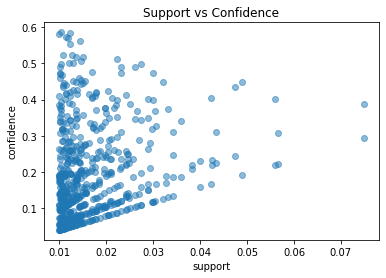

In [19]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

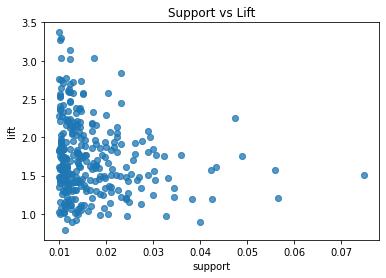

In [20]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

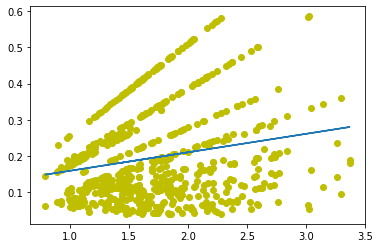

In [21]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

In [22]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(frankfurter),(other vegetables),0.058973,0.193493,0.016472,0.279310,1.443519,0.005061,1.119077
1,(other vegetables),(frankfurter),0.193493,0.058973,0.016472,0.085129,1.443519,0.005061,1.028589
2,(other vegetables),(chicken),0.193493,0.042908,0.017895,0.092486,2.155439,0.009593,1.054630
3,(chicken),(other vegetables),0.042908,0.193493,0.017895,0.417062,2.155439,0.009593,1.383521
4,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
...,...,...,...,...,...,...,...,...,...
613,"(whole milk, root vegetables)",(rolls/buns),0.048907,0.183935,0.012710,0.259875,1.412865,0.003714,1.102605
614,"(rolls/buns, root vegetables)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888,0.006500,1.560804
615,(whole milk),"(rolls/buns, root vegetables)",0.255516,0.024301,0.012710,0.049741,2.046888,0.006500,1.026772
616,(rolls/buns),"(whole milk, root vegetables)",0.183935,0.048907,0.012710,0.069099,1.412865,0.003714,1.021691
